# Analysis of Used Car Sales
### S364 Final Project
In the zip file, you should find a project instruction file in PDF format, a data file in csv format, and this jupyter notebook to serve as a starting point. The libraries have been imported for you in the first cell. Headers of difference sections have been provided as well. Your exploration might not follow the exact order of the headers and that's OK. The headers are meant to ensure that you don't forget anything significant.

When you submit the project, make sure you submit the notebook after it is fully executed with all the output. There should not be any execution errors in your output. After that, download a copy of the html file and submit it also.

In [1]:
%matplotlib inline
import datetime
from datetime import date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:.2f}'.format
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## Load Data and Initial Data Exploration

In [2]:
df = pd.read_csv("vehicles.csv")

In [3]:
## Get number of rows and columns
count_row = df.shape[0]  
count_col = df.shape[1]  

print("number of columns", count_col)
print("number of rows", count_row)

number of columns 26
number of rows 426880


In [4]:
## get basic information on each colunm
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

In [6]:
## get number of missing values in different col
df.isnull().sum() 

id                   0
url                  0
region               0
region_url           0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
image_url           68
description         70
county          426880
state                0
lat               6549
long              6549
posting_date        68
dtype: int64

In [5]:
# Explore Numerical Columns
df.describe()

,id,price,year,odometer,county,lat,long
count,426880.00,426880.00,425675.00,422480.00,0.00,420331.00,420331.00
mean,7311486634.22,75199.03,2011.24,98043.33,NaN,38.49,-94.75
std,4473170.41,12182282.17,9.45,213881.50,NaN,5.84,18.37
min,7207408119.00,0.00,1900.00,0.00,NaN,-84.12,-159.83
25%,7308143339.25,5900.00,2008.00,37704.00,NaN,34.60,-111.94
50%,7312620821.00,13950.00,2013.00,85548.00,NaN,39.15,-88.43
75%,7315253543.50,26485.75,2017.00,133542.50,NaN,42.40,-80.83
max,7317101084.00,3736928711.00,2022.00,10000000.00,NaN,82.39,173.89


In [8]:
# Explore Categorical Columns
df['year'] ##convert to datetime, exclude year > 2021, , replace missing value with 
df['fuel'] ##drop  
df['model']
df['condition'].unique()
df['cylinders']
df['title_status']
df['transmission'].unique()
df.duplicated(subset=['VIN']).sum() ## VIN should be unique, remove duplicates 
df['drive']
df['size']
df['type']
df['paint_color'].unique()

array([nan, 'white', 'blue', 'red', 'black', 'silver', 'grey', 'brown',
       'yellow', 'orange', 'green', 'custom', 'purple'], dtype=object)

## Clean the Data

In [9]:
## clean unnesseary information: drop url and county
df.drop(['county', 'url', 'region_url', 'image_url'], axis = 1, inplace = True)

In [10]:
# drop rows have 10 or more NA value(will drop 68 rows)
df.dropna(thresh = 10, inplace = True)

In [11]:
# drop rows price = 0 (will drop 32889 rows)
df.drop(df.loc[df['price'] == 0].index, inplace = True)

In [12]:
# VIN, id
# drop duplicate values (Observe: no duplicate values for these two columns)
df.drop_duplicates(subset = ['id', 'VIN'], inplace = True)
df["VIN"].fillna("unknown", inplace = True) 

In [13]:
##condition: 
## set odmeter threshold to determine the condition 
df['condition_updated']=pd.cut(df['odometer'], bins=[-1,3000,15000 ,40000, 85000, 150000, df['odometer'].max()+1 ], 
                   labels=['new', 'like new', 'excellent', 'good','fair' ,'salvage'])

In [14]:
# type
# drop nan
df.drop(df.loc[df['type'].isna()].index, inplace =True)

In [15]:
# size
# drop entire col
df.drop(['size'], axis = 1, inplace = True)

In [16]:
## year: convert datetime 
## drop year > 2022
## calculate car age 
today=date.today()
df['age']=today.year-df['year']
df.drop(df[df['age'] == -1].index, inplace = True)
df.drop(df[df['year'] >= 2022].index, inplace = True)
df["year"].fillna("unknown", inplace = True) 
#comment: unnecessary to convert year to datetime. The current years are integers, sufficient enough to do calculations.

In [17]:
## odometer 
## fill nan
df["odometer"].fillna("unknown", inplace = True) 
df['odometer'] = pd.to_numeric(df['odometer'],errors = 'coerce')

In [18]:
## manufacturer 
## fill nan 
df["manufacturer"].fillna("unknown", inplace = True) 

In [19]:
## model 
## fill nan
df["model"].fillna("unknown", inplace = True) 

In [20]:
## cylinders 
## fill nan
df["cylinders"].fillna("other", inplace = True) 

In [21]:
## fuel 
## fill nan
df["fuel"].fillna("other", inplace = True) 

In [22]:
## title_status 
## fill nan
df["title_status"].fillna("other", inplace = True) 

In [23]:
## transmission 
## fill nan
df["transmission"].fillna("other", inplace = True) 

In [24]:
## drive 
## fill nan
df["drive"].fillna("other", inplace = True) 

In [25]:
## paint_color
df["paint_color"].fillna("unknown", inplace = True) 

In [26]:
## posting date
## convert to date time and extract year, month day 
df['posting_date'] = pd.to_datetime(df['posting_date'].str[:-5], format='%Y-%m-%dT%H:%M:%S')

In [27]:
df.isnull().sum()

id                       0
region                   0
price                    0
year                     0
manufacturer             0
model                    0
condition            96746
cylinders                0
fuel                     0
odometer              1806
title_status             0
transmission             0
VIN                      0
drive                    0
type                     0
paint_color              0
description              1
state                    0
lat                   3183
long                  3183
posting_date             0
condition_updated     1806
age                    999
dtype: int64

In [28]:
df.to_csv("vehicles_clean.csv")

## Describe the Data

In [29]:
df_clean = pd.read_csv('vehicles_clean.csv')

In [30]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308004 entries, 0 to 308003
Data columns (total 24 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         308004 non-null  int64  
 1   id                 308004 non-null  int64  
 2   region             308004 non-null  object 
 3   price              308004 non-null  int64  
 4   year               308004 non-null  object 
 5   manufacturer       308004 non-null  object 
 6   model              308004 non-null  object 
 7   condition          211258 non-null  object 
 8   cylinders          308004 non-null  object 
 9   fuel               308004 non-null  object 
 10  odometer           306198 non-null  float64
 11  title_status       308004 non-null  object 
 12  transmission       308004 non-null  object 
 13  VIN                308004 non-null  object 
 14  drive              308004 non-null  object 
 15  type               308004 non-null  object 
 16  pa

In [31]:
# States covered in the dataset and number of ads by states 
df_clean['state'].nunique()

51

Text(0.5, 0.98, 'Top 10 Number of Ads by States ')

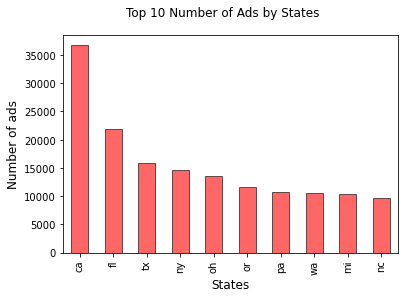

In [32]:
df_clean['state'].value_counts().head(10).plot(kind='bar', color = 'r', alpha = 0.6, edgecolor='k')
plt.xlabel('States', fontsize=12)
plt.ylabel('Number of ads', fontsize=12)
plt.suptitle('Top 10 Number of Ads by States ')

In [ ]:
# Manufacturers covered in the dataset and number of ads by Manufacturers

In [36]:
df_clean['manufacturer'].nunique()
## 43 - 1(unknown) = 42 manufacturers

43

Text(0.5, 0.98, 'Top 10 Number of Ads by Manufacturer ')

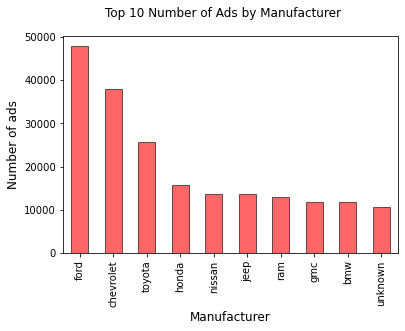

In [35]:
df_clean['manufacturer'].value_counts().head(10).plot(kind='bar',color = 'r', alpha = 0.6, edgecolor='k')
plt.xlabel('Manufacturer', fontsize=12)
plt.ylabel('Number of ads', fontsize=12)
plt.suptitle('Top 10 Number of Ads by Manufacturer ')

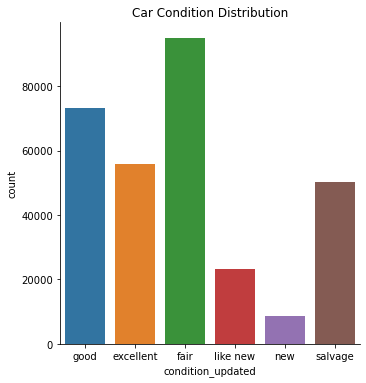

In [37]:
## Conditions of cars and number of cars in each condition (Ray)
df_clean['condition_updated'].value_counts()
sns.catplot(x="condition_updated", kind="count", data=df_clean).set(title='Car Condition Distribution')
plt.show()

In [ ]:
# Car median price by state
price_by_state = df_clean.groupby('state')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(20, 6))
plt.bar(x = price_by_state.index, height = price_by_state, color = 'r', alpha = 0.6, edgecolor='k')
plt.show()

In [ ]:
# Car meadian price by color
price_by_color = df_clean.groupby('paint_color')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(x = price_by_color.index, height = price_by_color, color = 'r', alpha = 0.6, edgecolor='k')
plt.show()

In [ ]:
# Car meadian price by type
price_by_type = df_clean.groupby('type')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(20, 6))
plt.bar(x = price_by_type.index, height = price_by_type, color = 'r', alpha = 0.6, edgecolor='k')
plt.show()

In [ ]:
# Car meadian price by manufacturer
price_by_manufacturer = df_clean.groupby('manufacturer')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(x = price_by_manufacturer.index, height = price_by_manufacturer, color = 'r', alpha = 0.6, edgecolor='k')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Car meadian price by condition
price_by_carcondition = df_clean.groupby('condition_updated')['price'].median().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
plt.bar(x = price_by_carcondition.index, height = price_by_carcondition, color = 'r', alpha = 0.6, edgecolor='k')
plt.xticks(rotation=35)
plt.show()

In [ ]:
# Car average age by state
age_by_state = df_clean.groupby('state')['age'].mean().sort_values(ascending=False)
plt.figure(figsize=(25, 6))
plt.bar(x = age_by_state.index, height = age_by_state, color = 'r', alpha = 0.6, edgecolor='k')
plt.xticks(rotation=35)
plt.ylim(0, 12)
plt.show()

In [ ]:
# Car average age by manufacturer
age_by_manufacturer = df_clean.groupby('manufacturer')['age'].mean().sort_values(ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(x = age_by_manufacturer.index, height = age_by_manufacturer, color = 'r', alpha = 0.6, edgecolor='k')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Car average odometers by manufacturer
odometer_by_manufacturer = df_clean.groupby('manufacturer')['odometer'].mean().sort_values(ascending=False)
plt.figure(figsize=(25, 10))
plt.bar(x = odometer_by_manufacturer.index, height = odometer_by_manufacturer, color = 'r', alpha = 0.6, edgecolor='k')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# Car average odometers by type
odometer_by_type = df_clean.groupby('type')['odometer'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
plt.bar(x = odometer_by_type.index, height = odometer_by_type, color = 'r', alpha = 0.6, edgecolor='k')
plt.xticks(rotation=45)
plt.ylim(0, 180000)
plt.show()

In [ ]:
# Car average odometers by condition
odometer_by_condition = df_clean.groupby('condition_updated')['odometer'].mean().sort_values(ascending=False)
plt.figure(figsize=(6, 6))
plt.bar(x = odometer_by_condition.index, height = odometer_by_condition, color = 'r', alpha = 0.6, edgecolor='k')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# fuel type
plt.figure(figsize=(20, 6))
sns.countplot(y='fuel', data=df_clean)
plt.show()

In [ ]:
# type
plt.figure(figsize=(20, 6))
sns.countplot(y='type', data=df_clean)
plt.show()

In [ ]:
# color
plt.figure(figsize=(20, 6))
sns.countplot(y='paint_color', data=df_clean)
plt.show()

In [ ]:
# drive
plt.figure(figsize=(20, 6))
sns.countplot(y='drive', data=df_clean)
plt.show()

In [ ]:
# cylinder
plt.figure(figsize=(20, 6))
sns.countplot(y='paint_color', data=df_clean)
plt.show()

In [ ]:
##Describe the price, odometer and age of the cars in general

In [ ]:
df_clean['age'].describe()
df_clean['price'].describe()
df_clean['odometer'].describe()

In [ ]:
#Price
sns.boxplot(data=df_clean,  y="price")
plt.ylim(0,150000)

In [ ]:
#Age
sns.boxplot(data=df_clean,  y="age")
plt.ylim(0,100)

In [ ]:
#Odometer
sns.boxplot(data=df_clean,  y="odometer")
plt.ylim(0,200000)

In [ ]:
#Price VS Age
sns.scatterplot(x="age", y='price', alpha=0.01,s=20, data=df_clean).set(title='Age Distribution')
plt.ylim(0,150000)
plt.show()

In [ ]:
##Price VS Condition
plt.figure(figsize=(25,10))
sns.boxplot(data=df_clean, x="condition_updated", y="price").set(title='Price VS Condition')
plt.ylim(0,100000)

## Generate Data Insights

In [ ]:
## How does the landform affect people’s choice of car? 

In [ ]:
## Snow States Average snow > 30 inches (20 states)
## vt me nh co ak mi ny ma wy wi mn ut ri ct sd mt nd id pa ia

In [38]:
snow_states = ['vt', 'me', 'nh', 'co', 'ak', 'mi', 'ny', 'ma', 'wy', 'wi', 'mn', 'ut', 'ri', 'ct', 'sd', 'mt', 'nd', 'id', 'pa', 'ia']
snow = df_clean.loc[df_clean['state'].isin(snow_states)]
not_snow = df_clean.loc[~df_clean['state'].isin(snow_states)]

In [39]:
snow['manufacturer'].value_counts().head(5)

ford         15684
chevrolet    13224
toyota        7510
jeep          5076
honda         4786
Name: manufacturer, dtype: int64

In [40]:
snow_sample = snow.sample(90000)
not_snow_sample = not_snow.sample(90000)
display(snow_sample["type"].value_counts())
print("==========================")
not_snow_sample["type"].value_counts()

SUV            22452
sedan          22363
pickup         11433
truck           9745
other           5407
coupe           4778
hatchback       4610
wagon           3447
van             2144
convertible     1884
mini-van        1450
offroad          146
bus              141
Name: type, dtype: int64

sedan          23994
SUV            19697
pickup         12417
truck           8500
other           6018
coupe           5668
hatchback       4700
wagon           2737
van             2412
convertible     2278
mini-van        1252
offroad          190
bus              137
Name: type, dtype: int64

In [78]:
snow_sample = snow.sample(90000)
not_snow_sample = not_snow.sample(90000)
display(snow_sample["manufacturer"].value_counts())
print("==========================")
not_snow_sample["manufacturer"].value_counts()

ford               14216
chevrolet          12010
toyota              6866
jeep                4606
honda               4342
gmc                 3989
ram                 3926
nissan              3723
unknown             3244
subaru              3163
bmw                 2946
dodge               2767
hyundai             2070
volkswagen          2049
mercedes-benz       1897
audi                1848
cadillac            1587
kia                 1587
lexus               1507
buick               1467
chrysler            1349
acura               1231
mazda               1136
lincoln              933
infiniti             909
volvo                789
mitsubishi           687
pontiac              524
mini                 496
jaguar               436
rover                371
mercury              289
saturn               216
alfa-romeo           202
porsche              199
tesla                190
fiat                 173
harley-davidson       33
ferrari               13
datsun                 7


ford               13897
chevrolet          10647
toyota              7816
honda               4700
nissan              4188
ram                 3678
jeep                3674
bmw                 3608
gmc                 3157
unknown             3021
mercedes-benz       2889
dodge               2701
hyundai             2269
volkswagen          2244
lexus               2197
audi                1897
kia                 1867
acura               1615
cadillac            1572
subaru              1537
mazda               1257
infiniti            1240
chrysler            1199
buick               1071
lincoln              994
volvo                782
mitsubishi           756
mini                 622
rover                518
jaguar               514
pontiac              365
porsche              318
tesla                253
mercury              234
alfa-romeo           232
saturn               206
fiat                 193
ferrari               25
harley-davidson       20
datsun                16


In [79]:
snow_sample = snow.sample(90000)
not_snow_sample = not_snow.sample(90000)
display(snow_sample["drive"].value_counts())
print("==========================")
not_snow_sample["drive"].value_counts()

4wd      39414
fwd      23440
other    16428
rwd      10718
Name: drive, dtype: int64

fwd      27195
4wd      26833
other    19931
rwd      16041
Name: drive, dtype: int64

In [80]:
snow_sample = snow.sample(90000)
not_snow_sample = not_snow.sample(90000)
display(snow_sample["paint_color"].value_counts())
print("==========================")
not_snow_sample["paint_color"].value_counts()

white      17172
black      16145
unknown    15439
silver     10597
blue        8628
red         8347
grey        6792
green       2098
brown       1855
custom      1685
orange       537
yellow       510
purple       195
Name: paint_color, dtype: int64

white      19845
unknown    17133
black      15536
silver     10743
blue        7449
red         7149
grey        5878
custom      1819
green       1730
brown       1607
yellow       511
orange       444
purple       156
Name: paint_color, dtype: int64

In [38]:
## average price for a volve wagon 
def get_avg_prices():
    car_price = snow.groupby(['manufacturer','type','drive'])['price'].mean()
    return car_price['ford']['SUV']['4wd']
get_avg_prices()

15760.96984717059

In [86]:
snow_sample = snow.sample(90000)
not_snow_sample = not_snow.sample(90000)
display(snow_sample["age"].mean())
print("==========================")
not_snow_sample["age"].mean()

9.429234183497083

9.123540292387235

In [42]:
# Mountain VS Plain :
mountain_states = ['co','nm','mo','ar','wy','mt','ut','id','az','wa','or','nv','ca', 'wv', 'pa', 'tn',
'vt', 'nh', 'me']
mountain = df_clean.loc[df_clean['state'].isin(mountain_states)]
plain = df_clean.loc[~df_clean['state'].isin(mountain_states)]

In [43]:
# Sampling:
mountain_sample = mountain.sample(120000)
plain_sample = plain.sample(120000)

In [44]:
display(mountain_sample["type"].value_counts())
print("==========================")
plain_sample["type"].value_counts()

sedan          30663
SUV            27743
pickup         15833
truck          14324
other           6962
hatchback       6448
coupe           6432
wagon           4216
van             2975
convertible     2689
mini-van        1292
offroad          290
bus              133
Name: type, dtype: int64

sedan          31649
SUV            27362
pickup         16287
truck          10388
other           8219
coupe           7589
hatchback       6057
wagon           3716
van             3178
convertible     3053
mini-van        2096
bus              217
offroad          189
Name: type, dtype: int64

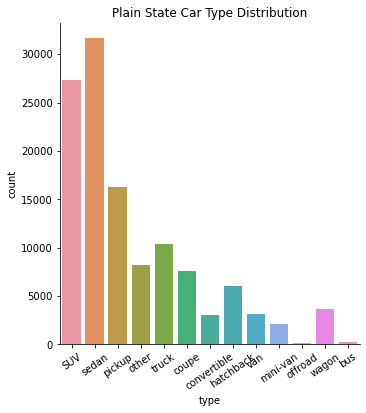

In [45]:
# Plain State Chart
sns.catplot(x="type", kind="count", data=plain_sample).set(title='Plain State Car Type Distribution')
plt.xticks(rotation=35)
plt.show()

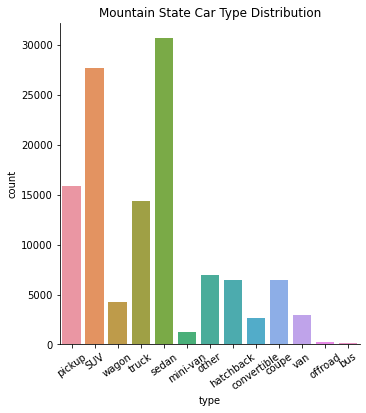

In [46]:
# Mountain State Chart
sns.catplot(x="type", kind="count", data=mountain_sample).set(title='Mountain State Car Type Distribution')
plt.xticks(rotation=35)
plt.show()

In [47]:
display(mountain_sample["drive"].value_counts())
print("==========================")
plain_sample["drive"].value_counts()

display(mountain_sample["manufacturer"].value_counts())
print("==========================")
plain_sample["manufacturer"].value_counts()

4wd      46074
fwd      33190
other    22981
rwd      17755
Name: drive, dtype: int64

ford               18334
chevrolet          13647
toyota             11584
honda               6226
ram                 6159
nissan              5485
jeep                5445
gmc                 4667
bmw                 4431
unknown             3768
subaru              3454
mercedes-benz       3444
dodge               3314
hyundai             3091
volkswagen          3028
lexus               2674
kia                 2427
audi                2347
cadillac            1779
acura               1720
mazda               1681
chrysler            1393
infiniti            1332
buick               1254
volvo               1162
mitsubishi           940
lincoln              869
mini                 829
rover                712
jaguar               528
porsche              458
pontiac              429
fiat                 295
tesla                258
alfa-romeo           257
mercury              246
saturn               234
ferrari               40
harley-davidson       35
datsun                15


ford               18811
chevrolet          15565
toyota              8914
honda               6119
nissan              5183
jeep                5176
bmw                 4733
gmc                 4598
unknown             4349
ram                 4303
dodge               3765
mercedes-benz       3378
hyundai             2904
volkswagen          2769
audi                2590
lexus               2541
kia                 2338
cadillac            2279
acura               2237
subaru              2226
chrysler            1835
buick               1803
infiniti            1637
mazda               1634
lincoln             1563
mitsubishi          1040
volvo                951
mini                 756
jaguar               721
pontiac              646
rover                600
mercury              394
alfa-romeo           365
porsche              352
tesla                324
saturn               303
fiat                 225
harley-davidson       36
ferrari               20
datsun                10


In [48]:
# Sample State Comparison:
fl=['fl']
FL=df_clean.loc[df_clean['state'].isin(fl)]
co=['co']
CO=df_clean.loc[df_clean['state'].isin(co)]
FL['type'].value_counts()

sedan          6483
SUV            4230
pickup         3039
truck          1838
coupe          1523
other          1105
hatchback       969
convertible     855
wagon           759
van             730
mini-van        346
bus              38
offroad          37
Name: type, dtype: int64

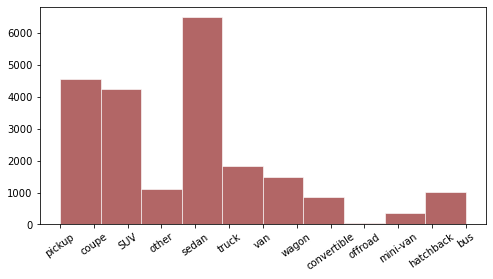

In [49]:
# FL Chart:
plt.figure(figsize=(8, 4))
plt.hist(FL['type'], alpha=0.6, edgecolor='w',color='maroon')
plt.xticks(rotation=35)
plt.show()

In [50]:
CO['type'].value_counts()

SUV            2333
sedan          1952
pickup         1266
truck           697
other           516
hatchback       404
wagon           390
coupe           365
van             196
convertible     106
mini-van         75
offroad          26
bus              16
Name: type, dtype: int64

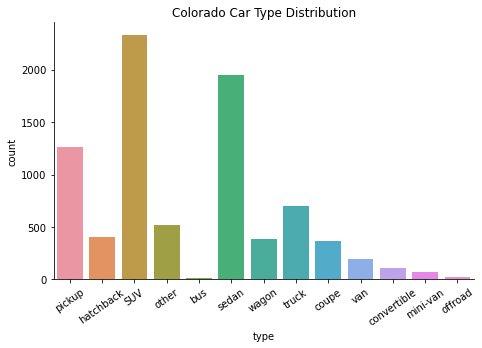

In [51]:
# CO Chart:
sns.catplot(x="type", kind="count", data=CO).set(title='Colorado Car Type Distribution')
plt.xticks(rotation=35)
plt.gcf().set_size_inches(7, 4)
plt.show()